# Stock Price Analystics with Alpha Vantage

In [1]:
!pip install requests pandas matplotlib

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
from dotenv import load_dotenv

In [ ]:
# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()
# Read the API key from environment variable
import os
api_key = os.getenv('ALPHA_VANTAGE_API_KEY')

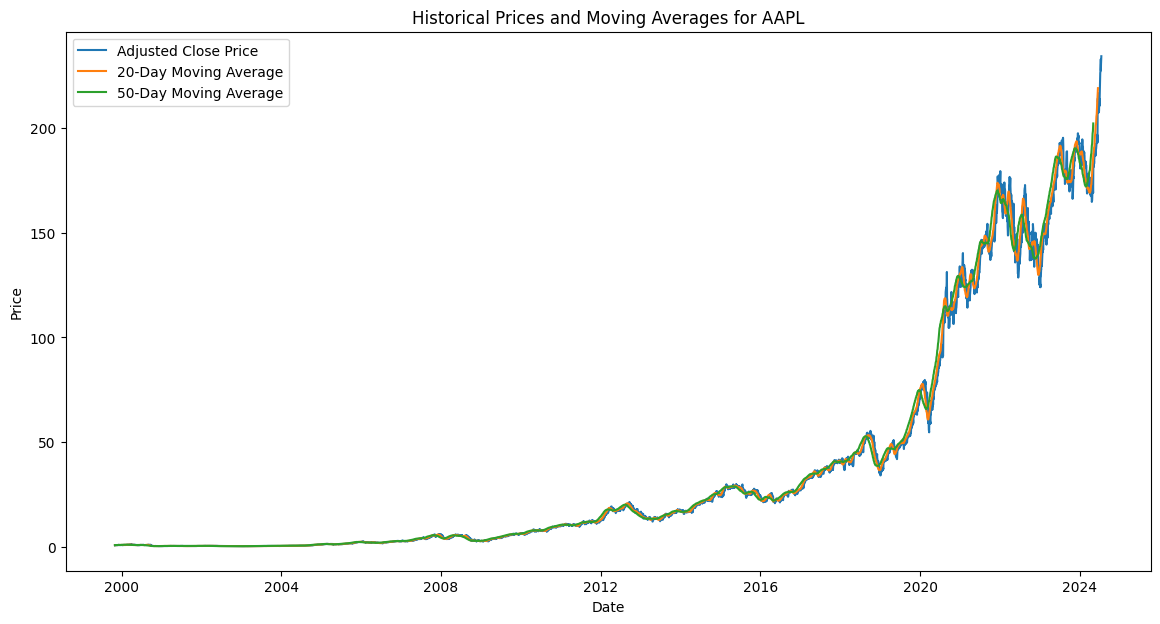

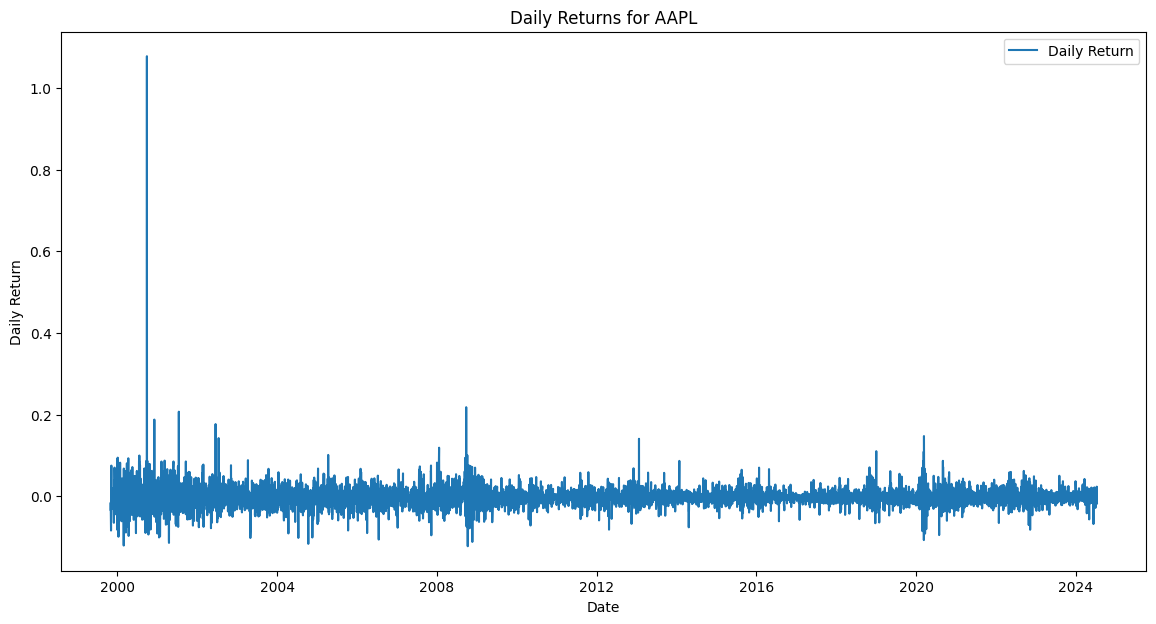

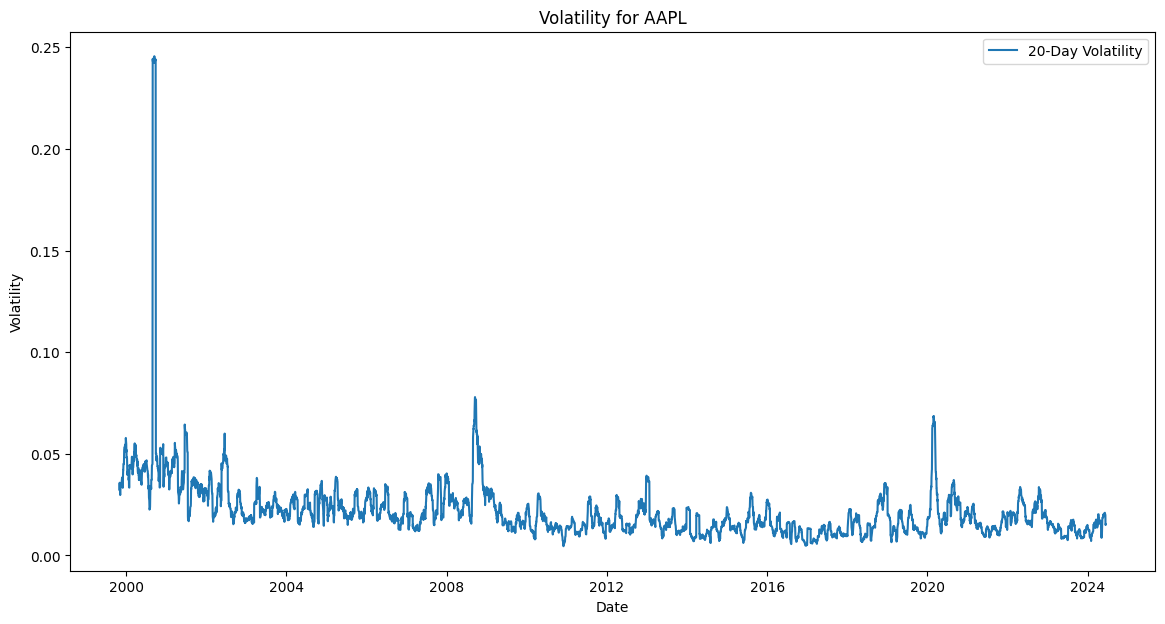

In [3]:


# Load environment variables from .env file
load_dotenv()

# Read the API key from environment variable
api_key = os.getenv('ALPHA_VANTAGE_API_KEY')

# Function to fetch historical daily price data
def fetch_historical_data(symbol, api_key, outputsize='compact'):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize={outputsize}&apikey={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        time_series = data['Time Series (Daily)']
        df = pd.DataFrame.from_dict(time_series, orient='index')
        df = df.astype(float)
        df.index = pd.to_datetime(df.index)
        df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient']
        return df
    else:
        print(f"Failed to fetch data for {symbol}. Status code: {response.status_code}")
        return None

# Example usage
symbol = 'AAPL'
data = fetch_historical_data(symbol, api_key, outputsize='full')

# Calculate Moving Averages
data['MA20'] = data['adjusted_close'].rolling(window=20).mean()
data['MA50'] = data['adjusted_close'].rolling(window=50).mean()

# Calculate Daily Returns
data['Daily Return'] = data['adjusted_close'].pct_change()

# Calculate Volatility (Rolling Standard Deviation)
data['Volatility'] = data['Daily Return'].rolling(window=20).std()

# Plot the historical prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['adjusted_close'], label='Adjusted Close Price')
plt.plot(data.index, data['MA20'], label='20-Day Moving Average')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average')
plt.title(f'Historical Prices and Moving Averages for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the daily returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Daily Return'], label='Daily Return')
plt.title(f'Daily Returns for {symbol}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Plot the volatility
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volatility'], label='20-Day Volatility')
plt.title(f'Volatility for {symbol}')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()